# Select reference samples
- 2020.12.29
- Idea：两两样本计算关联系数

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import dask.dataframe as dd

import function as func
import itertools
from datetime import datetime 

# Functions

In [2]:
def fetch_norm_rd(sampleID, sample_norm_file):
    df = pd.read_table(sample_norm_file,low_memory=False,header=None, sep='\t', \
                                 names=['chr', 'start','end','GC','RD',sampleID])
    return df[sampleID].to_frame()

In [3]:
def fetch_sampleID_from_filepath(filepath):
    filepath,tempfilename = os.path.split(filepath[0])
    sampleID = tempfilename.replace(".cov.bed.norm.gz","")
    return sampleID

# Variables

In [4]:
num_ref = 100
corr_threshold = -1

In [5]:
project_path = '/home/rt2776/1000GP/cnv_espresso/'

In [6]:
sample_norm_rd_file='/home/rt2776/1000GP/cnv_espresso/sample_norm_rd.list'
sample_norm_rd_file='/home/rt2776/1000GP/cnv_espresso/sample_norm_rd_NA12878.list'

# Processes

In [7]:
sample_norm_rd_list = func.fileToList_tab(sample_norm_rd_file)

In [9]:
func.showDateTime()
num = 0
combined_list = []
sampleID_list = []

for sample_rd_path in sample_norm_rd_list:
    sampleID = fetch_sampleID_from_filepath(sample_rd_path)
    sample_rd_file = sample_rd_path[0]
    num += 1
#     print(num, sampleID, sample_rd_file)
    if num % 10 == 0:
        func.showDateTime('\t')
        print("Importing No.%d sample:%s from %s"%(num, sampleID, sample_rd_file))
    rd_df = fetch_norm_rd(sampleID, sample_rd_file)
    combined_list.append(rd_df.to_numpy())
    sampleID_list.append(sampleID)

combined_np_array = np.hstack(combined_list) # convert to nparray to accelerate the speed.
combined_df = pd.DataFrame(combined_np_array,columns=sampleID_list)
# combined_df.columns = sampleID_list

func.showDateTime()

[2021.04.13-22:50:08]
[2021.04.13-22:50:10]	Importing No.10 sample:NA11832 from /home/rt2776/1000GP/cnv_espresso/norm/NA11832.cov.bed.norm.gz
[2021.04.13-22:50:13]	Importing No.20 sample:NA12044 from /home/rt2776/1000GP/cnv_espresso/norm/NA12044.cov.bed.norm.gz
[2021.04.13-22:50:16]	Importing No.30 sample:NA12760 from /home/rt2776/1000GP/cnv_espresso/norm/NA12760.cov.bed.norm.gz
[2021.04.13-22:50:19]	Importing No.40 sample:NA12874 from /home/rt2776/1000GP/cnv_espresso/norm/NA12874.cov.bed.norm.gz
[2021.04.13-22:50:23]	Importing No.50 sample:NA18970 from /home/rt2776/1000GP/cnv_espresso/norm/NA18970.cov.bed.norm.gz
[2021.04.13-22:50:25]	Importing No.60 sample:NA18987 from /home/rt2776/1000GP/cnv_espresso/norm/NA18987.cov.bed.norm.gz
[2021.04.13-22:50:28]	Importing No.70 sample:NA19119 from /home/rt2776/1000GP/cnv_espresso/norm/NA19119.cov.bed.norm.gz
[2021.04.13-22:50:31]	Importing No.80 sample:NA19160 from /home/rt2776/1000GP/cnv_espresso/norm/NA19160.cov.bed.norm.gz
[2021.04.13-22:50:

In [10]:
# faster way than `corrMatrix = combined_df.corr()`
# ref: https://stackoverflow.com/questions/56628363/computing-correlation-matrix-faster-in-pandas
## corrMatrix = pd.DataFrame(np.corrcoef(combined_df.values, rowvar=False), columns=combined_df.columns)

corrMatrix = pd.DataFrame(np.corrcoef(combined_np_array, rowvar=False), columns=sampleID_list)
func.showDateTime()

[2021.04.13-22:50:40]


In [11]:
corrMatrix

,NA06985,NA06994,NA07000,NA07056,NA07357,NA10847,NA11829,NA11830,NA11831,NA11832,...,NA19200,NA19201,NA19204,NA19206,NA19207,NA19209,NA19210,NA19222,NA19223,NA12878
0,1.000000,0.092923,0.020330,0.793983,0.907070,0.102342,0.392217,0.703511,0.888573,0.955069,...,0.105197,0.115657,0.099882,0.144180,0.137600,0.167920,0.141618,0.902149,0.135656,0.152380
1,0.092923,1.000000,0.119888,0.089709,0.127675,0.912220,0.141173,0.115538,0.125341,0.101449,...,0.913292,0.910832,0.892111,0.839280,0.842592,0.811432,0.845535,0.117560,0.846218,0.775528
2,0.020330,0.119888,1.000000,0.013954,0.018678,0.177647,0.844476,0.418973,0.018919,0.019752,...,0.075271,0.116246,0.183245,-0.019365,-0.018498,-0.015751,-0.018511,0.016510,-0.018599,0.058932
3,0.793983,0.089709,0.013954,1.000000,0.748664,0.103724,0.327030,0.588874,0.766412,0.796617,...,0.101753,0.113280,0.100233,0.136953,0.118739,0.135399,0.122775,0.721186,0.120656,0.150165
4,0.907070,0.127675,0.018678,0.748664,1.000000,0.112446,0.391102,0.636373,0.936661,0.921338,...,0.136797,0.125991,0.109498,0.156639,0.183646,0.194643,0.183959,0.888489,0.180019,0.154873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.167920,0.811432,-0.015751,0.135399,0.194643,0.782479,0.052081,0.090661,0.201613,0.184363,...,0.856530,0.829261,0.735125,0.920245,0.931613,1.000000,0.931979,0.209891,0.928144,0.785090
87,0.141618,0.845535,-0.018511,0.122775,0.183959,0.792527,0.050509,0.074571,0.186290,0.153933,...,0.893576,0.838112,0.745613,0.929621,0.955825,0.931979,1.000000,0.177234,0.952780,0.799130
88,0.902149,0.117560,0.016510,0.721186,0.888489,0.124063,0.372765,0.658089,0.873704,0.912449,...,0.130833,0.139238,0.120726,0.173066,0.176449,0.209891,0.177234,1.000000,0.173148,0.167384
89,0.135656,0.846218,-0.018599,0.120656,0.180019,0.789868,0.047719,0.070316,0.181746,0.148566,...,0.894238,0.838904,0.745197,0.928171,0.953095,0.928144,0.952780,0.173148,1.000000,0.788739


In [12]:
sampleID_str = '\t'.join([sampleID for sampleID in sampleID_list])

In [13]:
corr_matrix_file = project_path+'/correlation_matrix.txt'
np.savetxt(corr_matrix_file,corrMatrix, delimiter="\t", header=sampleID_str, comments='')

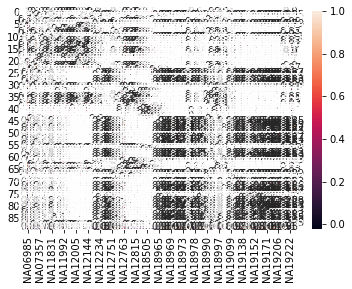

In [57]:
# sn.heatmap(corrMatrix, annot=True)
# plt.show()

# Select reference samples

In [85]:
for case_sampleID in sampleID_list:
    num_ref=100
    ref_sample_list = []

    print("case sampleID:",case_sampleID)
    ref_sample_df = corrMatrix[case_sampleID].sort_values(ascending=False)
    ref_sample_size = min(num_ref,len(corrMatrix))
    for i in range(1,ref_sample_size):
        ref_sampleID = sampleID_list[ref_sample_df.index[i]]
        ref_sample_corr = ref_sample_df.iloc[i]
        if ref_sample_corr >= corr_threshold:
            ref_sample_list.append([ref_sampleID, ref_sample_corr])

    output_ref_file = project_path + '/ref_samples/'+case_sampleID+'.ref.samples.txt'
    func.output_to_file(ref_sample_list, output_ref_file)

case sampleID: NA06985
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA06985.ref.samples.txt
[2021.04.06-13:17:19]
case sampleID: NA06994
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA06994.ref.samples.txt
[2021.04.06-13:17:19]
case sampleID: NA07000
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA07000.ref.samples.txt
[2021.04.06-13:17:19]
case sampleID: NA07056
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA07056.ref.samples.txt
[2021.04.06-13:17:19]
case sampleID: NA07357
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA07357.ref.samples.txt
[2021.04.06-13:17:19]
case sampleID: NA10847
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA10847.ref.samples.txt
[2021.04.06-13:17:19]
case sampleID: NA11829
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA11829.ref.samples.txt
[2021.04.06-13:17:19]
case sampleID: NA11830
[INF

case sampleID: NA18990
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA18990.ref.samples.txt
[2021.04.06-13:17:19]
case sampleID: NA18991
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA18991.ref.samples.txt
[2021.04.06-13:17:19]
case sampleID: NA18994
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA18994.ref.samples.txt
[2021.04.06-13:17:19]
case sampleID: NA18995
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA18995.ref.samples.txt
[2021.04.06-13:17:19]
case sampleID: NA18997
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA18997.ref.samples.txt
[2021.04.06-13:17:19]
case sampleID: NA18998
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA18998.ref.samples.txt
[2021.04.06-13:17:19]
case sampleID: NA19005
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA19005.ref.samples.txt
[2021.04.06-13:17:19]
case sampleID: NA19098
[INF

In [14]:
num_ref=100
ref_sample_list = []
case_sampleID = 'NA12878'

print("case sampleID:",case_sampleID)
ref_sample_df = corrMatrix[case_sampleID].sort_values(ascending=False)
ref_sample_size = min(num_ref,len(corrMatrix))
for i in range(1,ref_sample_size):
    ref_sampleID = sampleID_list[ref_sample_df.index[i]]
    ref_sample_corr = ref_sample_df.iloc[i]
    if ref_sample_corr >= corr_threshold:
        ref_sample_list.append([ref_sampleID, ref_sample_corr])

output_ref_file = project_path + '/ref_samples/'+case_sampleID+'.ref.samples.txt'
func.output_to_file(ref_sample_list, output_ref_file)

case sampleID: NA12878
[INFO]: File outputs to /home/rt2776/1000GP/cnv_espresso//ref_samples/NA12878.ref.samples.txt
[2021.04.13-22:51:59]


In [5]:
!jupyter nbconvert --to script select_reference.ipynb

Traceback (most recent call last):
  File "/data/rt2776/miniconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/data/rt2776/miniconda3/lib/python3.8/site-packages/jupyter_core/application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/data/rt2776/miniconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 837, in launch_instance
    app.start()
  File "/data/rt2776/miniconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "/data/rt2776/miniconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 519, in convert_notebooks
    self.exporter = cls(config=self.config)
  File "/data/rt2776/miniconda3/lib/python3.8/site-packages/nbconvert/exporters/templateexporter.py", line 325, in __init__
    super().__init__(config=config, **kw)
  File "/data/rt2776/miniconda3/lib/python3.8/site-packages/nbconvert/exp